In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.utils import shuffle
#CountVectorizer --> Bag of words
#TfidfVectorizer --> Tf-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from gensim.models import Word2Vec


In [2]:
df = pd.read_csv('preprocessed_data.csv')
df.head(500)

,Id,Review,Label,cleaned_reviews
0,0,good and interesting,5,ood interesting
1,1,"This class is very helpful to me. Currently, I...",5,"class helpful . currently , 'm still learning ..."
2,2,like!Prof and TAs are helpful and the discussi...,5,ike ! prof ta helpful discussion among student...
3,3,Easy to follow and includes a lot basic and im...,5,asy follow includes lot basic important techni...
4,4,Really nice teacher!I could got the point eazl...,4,eally nice teacher ! could got point eazliy v
...,...,...,...,...
495,495,"The instructor does an excellent job, but real...",3,"instructor excellent job , realistically way p..."
496,496,The course was enjoyable for the most partand ...,4,course enjoyable partand increased skill level...
497,497,This class was inspiring! I't was worth the wa...,5,class inspiring ! i't worth wait . thank ! !
498,498,Very interesting course. Maybe Fusion 360 may ...,5,ery interesting course . maybe fusion 360 may ...


### Sentiment mapping

In [4]:
sentiment_map = {1: "Negative", 2: "Negative", 3: "Neutral", 4: "Positive", 5: "Positive"}
df['sentiment'] = df['Label'].map(sentiment_map)
df.to_csv('preprocessed_data.csv') 

In [5]:
X = df['cleaned_reviews']
Y = df['sentiment']
X.fillna('', inplace=True)

In [ ]:
#Word2vec
sentences = [review.split() for review in X]
w2v = Word2Vec(
    window=10,
    min_count=1
)
w2v.build_vocab(sentences)
w2v.train(sentences, total_examples=w2v.corpus_count, epochs=w2v.epochs) #epochs -> number of times the model should do the iteration over given data

#save the model for further use 
w2v.save('D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/FreshModels/w2v')

In [6]:
# bag of words
bow = CountVectorizer()
X_bow = bow.fit_transform(X)
# TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

#save BoW and TF-IDF model
file1 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/FreshModels//bow'
file2 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/FreshModels/tfidf'
pickle.dump(bow, open(file1, 'wb'))
pickle.dump(tfidf, open(file2, 'wb'))



In [ ]:
#load the Word2Vec
w2v = Word2Vec.load('./trained-word2vec-studentReviews.model')
#creating sentence vector:
def sentence_to_vector(sentence, model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if not word_vectors:  # If the sentence contains no words in the model's vocabulary
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

# Create vectors for all sentences
X_w2v = np.array([sentence_to_vector(sentence, w2v) for sentence in X])

In [17]:
#test_size = 0.2 --> 20% of the data goes for testing and the remaing 80% goes for traning
#random_state = 42 --> ensures that the data is split in the same random way across all code runs-> this ensures efficient debugging
X_train_bow, X_test_bow, Y_train, Y_test = train_test_split(X_bow, Y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf,_, _ = train_test_split(X_tfidf, Y, test_size=0.2, random_state=42)
X_train_w2v, X_test_w2v,_, _ = train_test_split(X_w2v, Y, test_size=0.2, random_state=42)

In [6]:
#naive bayes
#Gaussian Naive Bayes classifier can handle continuous data.
nb_bow = MultinomialNB()
nb_bow.fit(X_train_bow, Y_train)

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, Y_train)

nb_w2v = GaussianNB()
nb_w2v.fit(X_train_w2v, Y_train)

#KNN
knn_bow = KNeighborsClassifier(n_neighbors=5)
knn_bow.fit(X_train_bow, Y_train)

knn_tfidf = KNeighborsClassifier(n_neighbors=5)
knn_tfidf.fit(X_train_tfidf, Y_train)

knn_w2v = KNeighborsClassifier(n_neighbors=5)
knn_w2v.fit(X_train_w2v, Y_train)



KNeighborsClassifier()

In [7]:
#SVM
#SVM performs better when the data is standarised or normalised, but in word2vec -> data is scaled
# scaler = StandardScaler()

# X_train_w2v_scaled = scaler.fit_transform(X_train_w2v)
# X_test_w2v_scaled = scaler.fit_transform(X_test_w2v)

svm_bow = LinearSVC(dual=False, max_iter=10000)
svm_bow.fit(X_train_bow, Y_train)

svm_tfidf = LinearSVC(dual=False, max_iter=10000)
svm_tfidf.fit(X_train_tfidf, Y_train)

svm_w2v = LinearSVC(dual=False, max_iter=10000)
svm_w2v.fit(X_train_w2v, Y_train)

LinearSVC(dual=False, max_iter=10000)

In [8]:
#Naive bayes
nb_pred_bow = nb_bow.predict(X_test_bow)
nb_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
nb_pred_w2v = nb_w2v.predict(X_test_w2v)
#KNN
knn_pred_bow = knn_bow.predict(X_test_bow)
knn_pred_tfidf = knn_tfidf.predict(X_test_tfidf)
knn_pred_w2v = knn_w2v.predict(X_test_w2v)
#SVM
svm_pred_bow = svm_bow.predict(X_test_bow)
svm_pred_tfidf = svm_tfidf.predict(X_test_tfidf)
svm_pred_w2v = svm_w2v.predict(X_test_w2v)

print('Naive Bayes(Bag of Words) accurancy: ', accuracy_score(Y_test, nb_pred_bow))
print('Naive Bayes(TF-IDF) accurancy: ', accuracy_score(Y_test, nb_pred_tfidf))
print('Naive Bayes(Word2Vec) accurancy: ', accuracy_score(Y_test, nb_pred_w2v))
print()
print('KNN(Bag of Words) accurancy: ', accuracy_score(Y_test, knn_pred_bow))
print('KNN(TF-IDF) accurancy: ', accuracy_score(Y_test, knn_pred_tfidf))
print('KNN(Word2Vec) accurancy: ', accuracy_score(Y_test, knn_pred_w2v))
print()
print('SVM(Bag of Words) accurancy: ', accuracy_score(Y_test, svm_pred_bow))
print('SVM(TF-IDF) accurancy: ', accuracy_score(Y_test, svm_pred_tfidf))
print('SVM(Word2Vec) accurancy: ', accuracy_score(Y_test, svm_pred_w2v))


Naive Bayes(Bag of Words) accurancy:  0.9208512673362028
Naive Bayes(TF-IDF) accurancy:  0.9298900047824008
Naive Bayes(Word2Vec) accurancy:  0.647297943567671

KNN(Bag of Words) accurancy:  0.9289813486370158
KNN(TF-IDF) accurancy:  0.9297465327594452
KNN(Word2Vec) accurancy:  0.9194165471066476

SVM(Bag of Words) accurancy:  0.9245337159253946
SVM(TF-IDF) accurancy:  0.9331420373027259
SVM(Word2Vec) accurancy:  0.9303204208512673


In [9]:
file1 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/FreshModels/nb_bow.sav'
file2 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/FreshModels/nb_tfidf.sav'
file3 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/FreshModels/nb_w2v.sav'
pickle.dump(nb_bow, open(file1, 'wb'))
pickle.dump(nb_tfidf, open(file2, 'wb'))
pickle.dump(nb_w2v, open(file3, 'wb'))
file4 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/FreshModels/knn_bow.sav'
file5 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/FreshModels/knn_tfidf.sav'
file6 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/FreshModels/knn_w2v.sav'
pickle.dump(knn_bow, open(file4, 'wb'))
pickle.dump(knn_tfidf, open(file5, 'wb'))
pickle.dump(knn_w2v, open(file6, 'wb'))
file7 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/FreshModels/svm_bow.sav'
file8 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/FreshModels/svm_tfidf.sav'
file9 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/FreshModels/svm_w2v.sav'
pickle.dump(svm_bow, open(file7, 'wb'))
pickle.dump(svm_tfidf, open(file8, 'wb'))
pickle.dump(svm_w2v, open(file9, 'wb'))

### Analysis


In [18]:
#load the trained models
file1 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/FreshModels/nb_bow.sav'
file2 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/FreshModels/nb_tfidf.sav'
file3 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/FreshModels/nb_w2v.sav'
file4 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/FreshModels/knn_bow.sav'
file5 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/FreshModels/knn_tfidf.sav'
file6 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/FreshModels/knn_w2v.sav'
file7 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/FreshModels/svm_bow.sav'
file8 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/FreshModels/svm_tfidf.sav'
file9 = 'D:/Study/College/IV Sem/Mini Project/Codes/Trained Models/FreshModels/svm_w2v.sav'
nb_bow = pickle.load(open(file1, 'rb'))
nb_tfidf = pickle.load(open(file2, 'rb'))
nb_w2v = pickle.load(open(file3, 'rb'))
knn_bow = pickle.load(open(file4, 'rb'))
knn_tfidf = pickle.load(open(file5, 'rb'))
knn_w2v = pickle.load(open(file6, 'rb'))
svm_bow = pickle.load(open(file7, 'rb'))
svm_tfidf = pickle.load(open(file8, 'rb'))
svm_w2v = pickle.load(open(file9, 'rb'))

In [32]:
# Naive Bayes
print('Naive Bayes (Bag of Words) Precision: ', precision_score(Y_test, nb_pred_bow, average='weighted'))
print('Naive Bayes (Bag of Words) Recall: ', recall_score(Y_test, nb_pred_bow, average='weighted'))
print('Naive Bayes (Bag of Words) F1-score: ', f1_score(Y_test, nb_pred_bow, average='weighted'))
print()
print('Naive Bayes (TF-IDF) Precision: ', precision_score(Y_test, nb_pred_tfidf, average='weighted'))
print('Naive Bayes (TF-IDF) Recall: ', recall_score(Y_test, nb_pred_tfidf, average='weighted'))
print('Naive Bayes (TF-IDF) F1-score: ', f1_score(Y_test, nb_pred_tfidf, average='weighted'))
print()
print('Naive Bayes (Word2Vec) Precision: ', precision_score(Y_test, nb_pred_w2v, average='weighted'))
print('Naive Bayes (Word2Vec) Recall: ', recall_score(Y_test, nb_pred_w2v, average='weighted'))
print('Naive Bayes (Word2Vec) F1-score: ', f1_score(Y_test, nb_pred_w2v, average='weighted'))
print()

# KNN
print('KNN (Bag of Words) Precision: ', precision_score(Y_test, knn_pred_bow, average='weighted'))
print('KNN (Bag of Words) Recall: ', recall_score(Y_test, knn_pred_bow, average='weighted'))
print('KNN (Bag of Words) F1-score: ', f1_score(Y_test, knn_pred_bow, average='weighted'))
print()
print('KNN (TF-IDF) Precision: ', precision_score(Y_test, knn_pred_tfidf, average='weighted'))
print('KNN (TF-IDF) Recall: ', recall_score(Y_test, knn_pred_tfidf, average='weighted'))
print('KNN (TF-IDF) F1-score: ', f1_score(Y_test, knn_pred_tfidf, average='weighted'))
print()
print('KNN (Word2Vec) Precision: ', precision_score(Y_test, knn_pred_w2v, average='weighted'))
print('KNN (Word2Vec) Recall: ', recall_score(Y_test, knn_pred_w2v, average='weighted'))
print('KNN (Word2Vec) F1-score: ', f1_score(Y_test, knn_pred_w2v, average='weighted'))
print()

# SVM
print('SVM (Bag of Words) Precision: ', precision_score(Y_test, svm_pred_bow, average='weighted'))
print('SVM (Bag of Words) Recall: ', recall_score(Y_test, svm_pred_bow, average='weighted'))
print('SVM (Bag of Words) F1-score: ', f1_score(Y_test, svm_pred_bow, average='weighted'))
print()
print('SVM (TF-IDF) Precision: ', precision_score(Y_test, svm_pred_tfidf, average='weighted'))
print('SVM (TF-IDF) Recall: ', recall_score(Y_test, svm_pred_tfidf, average='weighted'))
print('SVM (TF-IDF) F1-score: ', f1_score(Y_test, svm_pred_tfidf, average='weighted'))
print()
print('SVM (Word2Vec) Precision: ', precision_score(Y_test, svm_pred_w2v, average='weighted'))
print('SVM (Word2Vec) Recall: ', recall_score(Y_test, svm_pred_w2v, average='weighted'))
print('SVM (Word2Vec) F1-score: ', f1_score(Y_test, svm_pred_w2v, average='weighted'))


Naive Bayes (Bag of Words) Precision:  0.9034620716110883
Naive Bayes (Bag of Words) Recall:  0.9208512673362028
Naive Bayes (Bag of Words) F1-score:  0.9103144128625703

Naive Bayes (TF-IDF) Precision:  0.8717144119328326
Naive Bayes (TF-IDF) Recall:  0.9298900047824008
Naive Bayes (TF-IDF) F1-score:  0.8968686428142789

Naive Bayes (Word2Vec) Precision:  0.9187404403461764
Naive Bayes (Word2Vec) Recall:  0.647297943567671
Naive Bayes (Word2Vec) F1-score:  0.746801962099417

KNN (Bag of Words) Precision:  0.8890874845794139
KNN (Bag of Words) Recall:  0.9289813486370158
KNN (Bag of Words) F1-score:  0.9011802727514538

KNN (TF-IDF) Precision:  0.8876338793393118
KNN (TF-IDF) Recall:  0.9297465327594452
KNN (TF-IDF) F1-score:  0.8996074118881806

KNN (Word2Vec) Precision:  0.899697749699455
KNN (Word2Vec) Recall:  0.9194165471066476
KNN (Word2Vec) F1-score:  0.9081616019000505

SVM (Bag of Words) Precision:  0.9084578463425447
SVM (Bag of Words) Recall:  0.9245337159253946
SVM (Bag of 

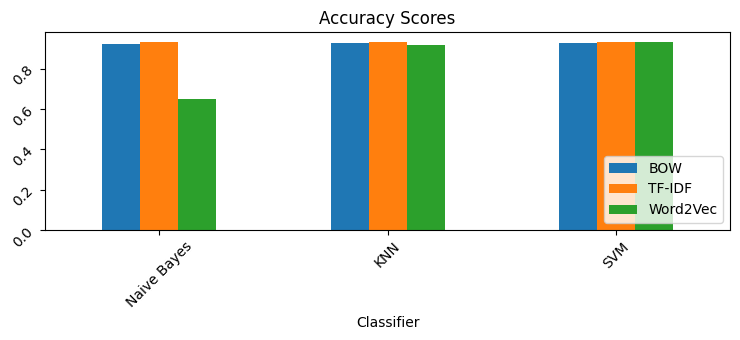

In [29]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
d = {
    "Classifier" : ["Naive Bayes", "KNN", "SVM"],
    "BOW" : [accuracy_score(Y_test, nb_pred_bow), accuracy_score(Y_test, knn_pred_bow), accuracy_score(Y_test, svm_pred_bow)],
    "TF-IDF" : [accuracy_score(Y_test, nb_pred_tfidf), accuracy_score(Y_test, knn_pred_tfidf), accuracy_score(Y_test, svm_pred_tfidf)],
    "Word2Vec": [accuracy_score(Y_test, nb_pred_w2v), accuracy_score(Y_test, knn_pred_w2v), accuracy_score(Y_test, svm_pred_w2v)]
}

df2 = pd.DataFrame(d)
df2.set_index('Classifier').plot(kind="bar", align='center', width=0.5)
plt.tick_params(rotation = 45)
plt.legend(loc='lower right')
plt.title('Accuracy Scores')
plt.show()

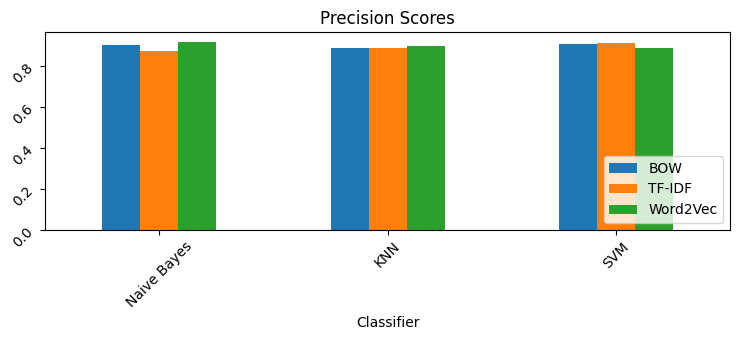

In [25]:
# Precision
precision_data = {
    "Classifier": ["Naive Bayes", "KNN", "SVM"],
    "BOW": [precision_score(Y_test, nb_pred_bow, average='weighted'), precision_score(Y_test, knn_pred_bow, average='weighted'), precision_score(Y_test, svm_pred_bow, average='weighted')],
    "TF-IDF": [precision_score(Y_test, nb_pred_tfidf, average='weighted'), precision_score(Y_test, knn_pred_tfidf, average='weighted'), precision_score(Y_test, svm_pred_tfidf, average='weighted')],
    "Word2Vec": [precision_score(Y_test, nb_pred_w2v, average='weighted'), precision_score(Y_test, knn_pred_w2v, average='weighted'), precision_score(Y_test, svm_pred_w2v, average='weighted')]
}

precision_df = pd.DataFrame(precision_data)
precision_df.set_index('Classifier').plot(kind="bar", align='center', width=0.5)
plt.tick_params(rotation=45)
plt.legend(loc='lower right')
plt.title('Precision Scores')
plt.show()

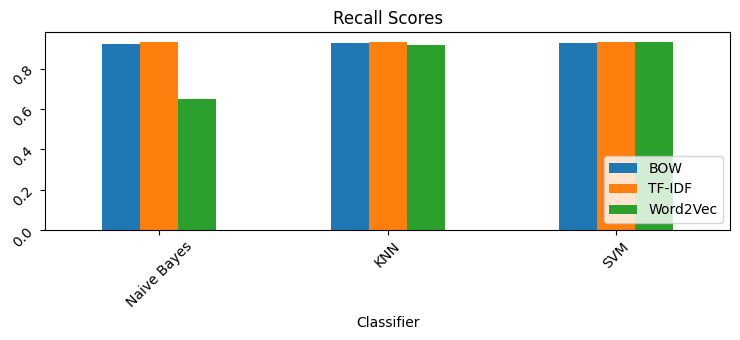

In [28]:
# Recall
recall_data = {
    "Classifier": ["Naive Bayes", "KNN", "SVM"],
    "BOW": [recall_score(Y_test, nb_pred_bow, average='weighted'), recall_score(Y_test, knn_pred_bow, average='weighted'), recall_score(Y_test, svm_pred_bow, average='weighted')],
    "TF-IDF": [recall_score(Y_test, nb_pred_tfidf, average='weighted'), recall_score(Y_test, knn_pred_tfidf, average='weighted'), recall_score(Y_test, svm_pred_tfidf, average='weighted')],
    "Word2Vec": [recall_score(Y_test, nb_pred_w2v, average='weighted'), recall_score(Y_test, knn_pred_w2v, average='weighted'), recall_score(Y_test, svm_pred_w2v, average='weighted')]
}

recall_df = pd.DataFrame(recall_data)
recall_df.set_index('Classifier').plot(kind="bar", align='center', width=0.5)
plt.tick_params(rotation=45)
plt.legend(loc='lower right')
plt.title('Recall Scores')
plt.show()

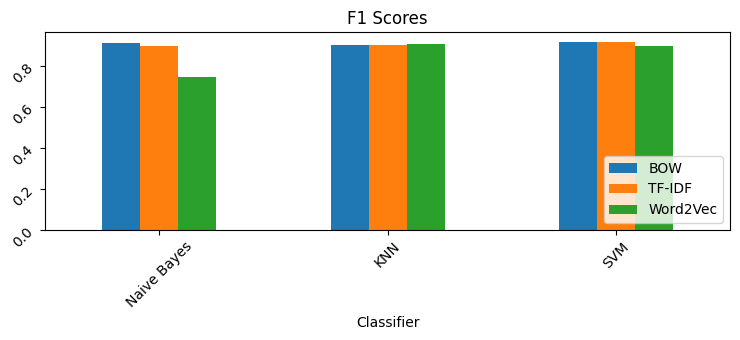

In [31]:
# F1-Score
f1_data = {
    "Classifier": ["Naive Bayes", "KNN", "SVM"],
    "BOW": [f1_score(Y_test, nb_pred_bow, average='weighted'), f1_score(Y_test, knn_pred_bow, average='weighted'), f1_score(Y_test, svm_pred_bow, average='weighted')],
    "TF-IDF": [f1_score(Y_test, nb_pred_tfidf, average='weighted'), f1_score(Y_test, knn_pred_tfidf, average='weighted'), f1_score(Y_test, svm_pred_tfidf, average='weighted')],
    "Word2Vec": [f1_score(Y_test, nb_pred_w2v, average='weighted'), f1_score(Y_test, knn_pred_w2v, average='weighted'), f1_score(Y_test, svm_pred_w2v, average='weighted')]
}

f1_df = pd.DataFrame(f1_data)
f1_df.set_index('Classifier').plot(kind="bar", align='center', width=0.5)
plt.tick_params(rotation=45)
plt.legend(loc='lower right')
plt.title('F1 Scores')
plt.show()